# Computer Lab 2, Part I

This notebook consists of instructions, exercises and questions that form the practical part of Lab II, Part I. In this assignment, you will learn the basics of the OpenStack Python APIs that can be used to interact directly with the IaaS services Keystone (Identity), Glance (Image) and Nova (compute). Please prepare your solution and answers to questions directly in this notebook, and export it to PDF. Upload that PDF as to the student portal to complete Part I of the Lab.  

## Task - 1

In [1]:
from os import environ as env
import keystoneclient.v3.client as ksclient

To establish a client connection, we will need to pass a dictionary with information about the tenant, user, credentials and the API Identity endpoint. Here, I have sourced the "openrc.sh file" obtained from the Horizon dashboard in the underlying shell prior to starting the notebook. Hence, in order to actually run the code below, you would need to do the same with your own credentials. 

In [2]:
keystone = ksclient.Client(auth_url=env['OS_AUTH_URL'],
                           username=env['OS_USERNAME'],
                           password=env['OS_PASSWORD'],
                           project_name=env['OS_PROJECT_NAME'],
                           project_domain_name=env['OS_USER_DOMAIN_NAME'],
                           project_id=env['OS_PROJECT_ID'],
                           version=env['OS_IDENTITY_API_VERSION'],
                           user_domain_name=env['OS_USER_DOMAIN_NAME'],
                           region_name=env['OS_REGION_NAME'])

# Next command will collect all the available endpoints in keystone.

In [3]:
endpoints = keystone.service_catalog.get_endpoints()

# Next section will print the services with associated infromation.

In [4]:
for endpoint in endpoints:
    for edp in endpoints[endpoint]:
        if edp['interface'] == 'public':
            print ('service: ', endpoint, ', region: ', edp['region'], ', public endpoint: ', edp['url'])
        elif edp['interface'] == 'internal':
            print ('service: ', endpoint, ', region: ', edp['region'], ', internal endpoint: ', edp['url'])

service:  compute , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8774/v2.1
service:  compute , region:  east-1 , internal endpoint:  http://172.29.236.9:8774/v2.1
service:  identity , region:  east-1 , internal endpoint:  http://172.29.236.9:5000
service:  identity , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:5000
service:  cloudformation , region:  east-1 , internal endpoint:  http://172.29.236.9:8000/v1
service:  cloudformation , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8000/v1
service:  orchestration , region:  east-1 , internal endpoint:  http://172.29.236.9:8004/v1/fc1aade83c2e49baa7498b3918560d9f
service:  orchestration , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:8004/v1/fc1aade83c2e49baa7498b3918560d9f
service:  network , region:  east-1 , internal endpoint:  http://172.29.236.9:9696
service:  network , region:  east-1 , public endpoint:  https://east-1.cloud.snic.se:9696
service:  volumev3 

## Questions:

# Answers

1 - With the use of OpenStack Python API the code shows the public and internal (after the modification) endpoints with the correlated services and regions of each endpoint. The first step is to retrieve the data from the enviroment variables and to save it to the keystone variable. After that, endpoints variable stores the endpoints information. Finally with the use of python3 we retrieve information related to the interface of the endpoints.

2 - We need our own openrc file in order to pass the neccesary environment variables to our code. If we have not used the command "source openrc.sh" to create and use the environment variables we could not communicate with the cloud through the VM and the API.

3 - The code above modified in order to show the public and internal endpoints

4 - The different interfaces of the endpoints are used to separate to who the endpoint is available for security reasons and for restrictions. For example, public endpoints can be used for users through the internet and internal endpoints can be used to the hosts that contain OpenStack services.

## Task - 2

In this task you need to write a small python program using Keystone and Nova APIs to list all the available VMs in the project. 

Use the following links and the code available in Task-1. 

https://docs.openstack.org/python-novaclient/pike/ https://docs.openstack.org/python-novaclient/pike/reference/api/index.html

Following are the functions required to accomplish the task: 

Load the required plugin:<br />
loader = loading.get_plugin_loader(...)

Create the auth object:<br />
auth = loader.load_from_options(....) 

Create session object using "auth":<br />
sess = session.Session( .... )

Create Nova Client Object:<br />
nova = client.Client( ... )

Print the Vms:<br />
nova.servers.list():

In [5]:
from keystoneauth1 import loading
from keystoneauth1 import session
from novaclient import client

loader = loading.get_plugin_loader('password')

auth = loader.load_from_options(auth_url=env['OS_AUTH_URL'],
                                username=env['OS_USERNAME'],
                                password=env['OS_PASSWORD'],
                                project_name=env['OS_PROJECT_NAME'],
                                project_domain_name=env['OS_USER_DOMAIN_NAME'],
                                project_id=env['OS_PROJECT_ID'],
                                user_domain_name=env['OS_USER_DOMAIN_NAME'])

sess = session.Session(auth=auth)

nova = client.Client('2.1', session=sess)

nova.servers.list()

[<Server: docker_cloud>,
 <Server: vm_py_script_kev_cloud>,
 <Server: vm1>,
 <Server: s3>,
 <Server: wezh_lab2_scripted_instance>,
 <Server: sai_l2_task2>,
 <Server: ah_docker>,
 <Server: jovi3089_C2>,
 <Server: lisa_C2>,
 <Server: akshai_cmd_C1>,
 <Server: aham_docker>,
 <Server: vm1_alex>,
 <Server: girish2>,
 <Server: stack_with_init_script-my_instance1-twsbcyltyqdk>,
 <Server: stack_with_init_script-my_instance0-tbufgcn3sk6i>,
 <Server: akshai_C1>,
 <Server: girish1>,
 <Server: julie-vm2>,
 <Server: s1>,
 <Server: Sotiris_notebook>,
 <Server: vm1>,
 <Server: yudulab2>,
 <Server: Julie-Lab-2>,
 <Server: alex-lab2-test>,
 <Server: Henkeinst-WSL>,
 <Server: a_hameed>,
 <Server: maha_script>,
 <Server: c-2>,
 <Server: shqi>,
 <Server: RaheelInit>,
 <Server: test_lab3>,
 <Server: Aneysha-LAb2>,
 <Server: emgo2250_L2>,
 <Server: dapi_vm1>,
 <Server: test_cont_Ellinor_C2>,
 <Server: marcus_test>,
 <Server: c2_kevaja>,
 <Server: instance-kev>,
 <Server: Ego_C2>,
 <Server: Raheel_Docker>,
 

## Task - 3:

Try to measure the speed with which you can put and get files to and from volumes. Conduct your experiment several times to gather statistic and plot a) A estimated distribution of the time taken (in wall clock) to write and read a file of size 10MB in your volume and b) vary the size of the file from 10kB to 100MB and plot the read and write throughput (in MB/s) times as a function of file size (for the smaller data sizes, you might need to repeat the experiment many times and obtain a statistical average). Use "Root" disk as a reference point. Include the resulting graphs and a description of your experiment in the report.

Average time to write 10MB file = 0.00020137786865234375 seconds
Average time to read 10MB file = 2.959728240966797e-05 seconds
Populating the interactive namespace from numpy and matplotlib


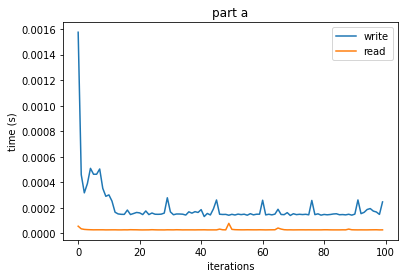

Populating the interactive namespace from numpy and matplotlib


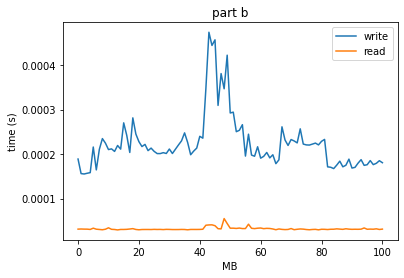

In [6]:
#Implement you solution here. Hint, the following command
import os
import time

#define the number of iterations in order to repeat the same experinment many times and to calculate the average
iterations_time = 100


# Task a #


filename = "/home/ubuntu/volume/10MB"
        
ta_write = [None] * iterations_time
ta_read = [None] * iterations_time

#write 10MB
for i in range(iterations_time):
    t0 = time.time()
    fw = open(filename,"wb")
    #create a file of 10MB
    fw.seek(1024*1024*10-1)
    fw.write(b"\0")
    fw.close()
    ta_write[i] = time.time() - t0

#calculate the average
print("Average time to write 10MB file =" , sum(ta_write)/iterations_time, "seconds")

#read 10MB
for i in range(iterations_time):
    t0 = time.time()
    #read the 10MB file
    fr = open(filename,"r")
    fr.close()
    ta_read[i] = time.time() - t0

#calculate the average
print("Average time to read 10MB file =" , sum(ta_read)/iterations_time, "seconds")

#plot the time of each iteration for read and write
%pylab inline
plt.plot(ta_write,label='write')
plt.plot(ta_read,label='read')
plt.xlabel('iterations')
plt.ylabel('time (s)')
plt.title('part a')
plt.legend(loc="upper right")
plt.show()


#Task b 


filename2 = "/home/ubuntu/volume/x_file"

#iterations = 10kB, 1MB, 2MB, 3MB, 4MB, ... 99MB, 100MB
iterations_b = 101
temp = [None] * iterations_time
t_read = [None] * iterations_b
t_write = [None] * iterations_b

for i in range(iterations_b):
    #write
    if (i == 0):
        for j in range(iterations_time):
            t0 = time.time()
            fw = open(filename2,"wb")
            #begin with 10kB
            fw.seek(1024*10)
            fw.write(b"\0")
            fw.close()
            temp[j] = time.time() - t0
        #calculate the average to write for each file
        t_write[i] = sum(temp)/iterations_time
    else:
        for j in range(iterations_time):
            t0 = time.time()
            fw = open(filename2,"wb")
            #begin with 1MB till 100MB
            fw.seek(1024*1024*i-1)
            fw.write(b"\0")
            fw.close()
            temp[j] = time.time() - t0
        #calculate the average to write for each file
        t_write[i] = sum(temp)/iterations_time
        #print(i,"time to write",t_write[i])

    #read
    for j in range(iterations_time):
        t0 = time.time()
        #read the created file
        fr = open(filename2,"r")
        fr.close()
        temp[j] = time.time() - t0
    #calculate the average to read for each file
    t_read[i] = sum(temp)/iterations_time
    #print(i,"time to read",t_read[i])

#plot the time of each file from 10kB to 100MB for read and write
%pylab inline
plt.plot(t_write,label='write')
plt.plot(t_read,label='read')
plt.xlabel('MB')
plt.ylabel('time (s)')
plt.title('part b')
plt.legend(loc="upper right")

Don't foget to terminate resources after your experiments. 

In [7]:
# Clean up volumes